# Generte the posterior distributions for The reproductive rate and expected values

#Author: Imelda Trejo 
#February 17, 2022

MCMC: YT

In [1]:
# Import relevant modules
import numpy as np
import pandas as pd
import random
from scipy.stats import nbinom, expon
from scipy.special import factorial
from scipy.special import loggamma
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt
from copy import copy
from matplotlib import cm
import datetime


In [2]:
plt.rcParams.update({'font.size':16})
colors = cm.plasma(np.linspace(0,1,12))
dateIndex = ['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29', '2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15',]
totalN = len(dateIndex)
for k in range(0,totalN):
    a= np.datetime64(dateIndex[k])
    a= a.astype(datetime.datetime)
    dateIndex[k]=a.strftime('%b-%d-%y')


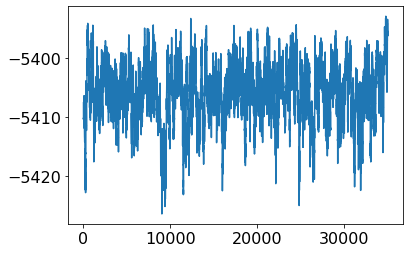

In [5]:
#0,1,...,6,7,8,9
key=2
state=['NM','TX','NY','CA','FL','MI','Lin','LinPsi1','LinPsi2','LinPsi3'][key]


prefix='round-4-'+state
logLLog = np.genfromtxt(prefix+'logLLog.txt')
parLog = np.genfromtxt(prefix+'parLog.txt')
#parRho = np.genfromtxt(prefix+'RhoPosterior.txt')
#parMuk = np.genfromtxt(prefix+'MukPosterior.txt')
#acceptLog = np.genfromtxt(prefix+'acceptLog.txt')
plt.plot(logLLog[logLLog>-1e15])




<Figure size 432x288 with 0 Axes>

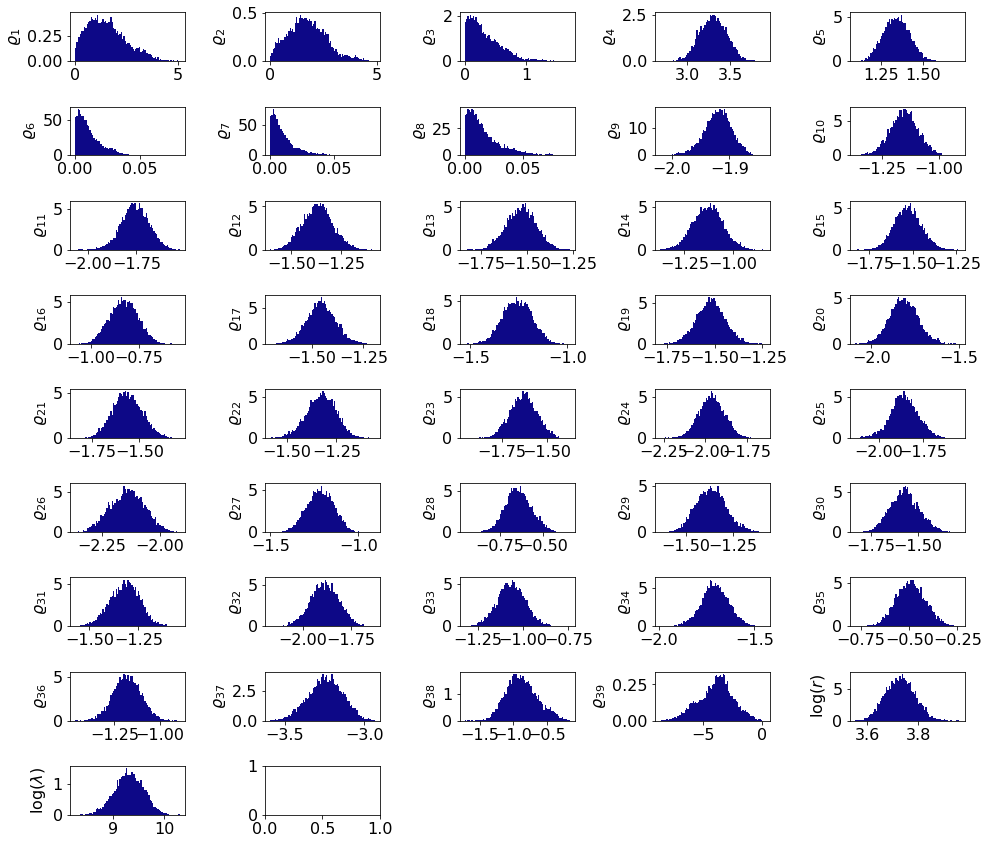

In [6]:
#US states:

fig = plt.figure()

fig, ax = plt.subplots(9,5,figsize=(14, 12))
onset = 0
end = len(logLLog[logLLog>-1e15])

colors = cm.plasma(np.linspace(0,1,12))

for i in range(9):    
    for j in range(5):
        if (5*i+j)<39:
            ax[i,j].hist((parLog[onset:end,5*i+j]), bins=80, facecolor=colors[0],density=True)
            ax[i,j].set_ylabel('$\\varrho_{'+str(5*i+j+1)+'}$')
        if 5*i+j==39:
            ax[i,j].hist((parLog[onset:end,5*i+j]), bins=80, facecolor=colors[0],density=True)
            ax[i,j].set_ylabel('$\log(r)$')
        if 5*i+j==40:
            ax[i,j].hist((parLog[onset:end,5*i+j]), bins=80, facecolor=colors[0],density=True)
            ax[i,j].set_ylabel('$\log(\\lambda)$')

ax[-1, -1].axis('off')
ax[-1, -2].axis('off')
ax[-1, -3].axis('off')

fig.tight_layout()


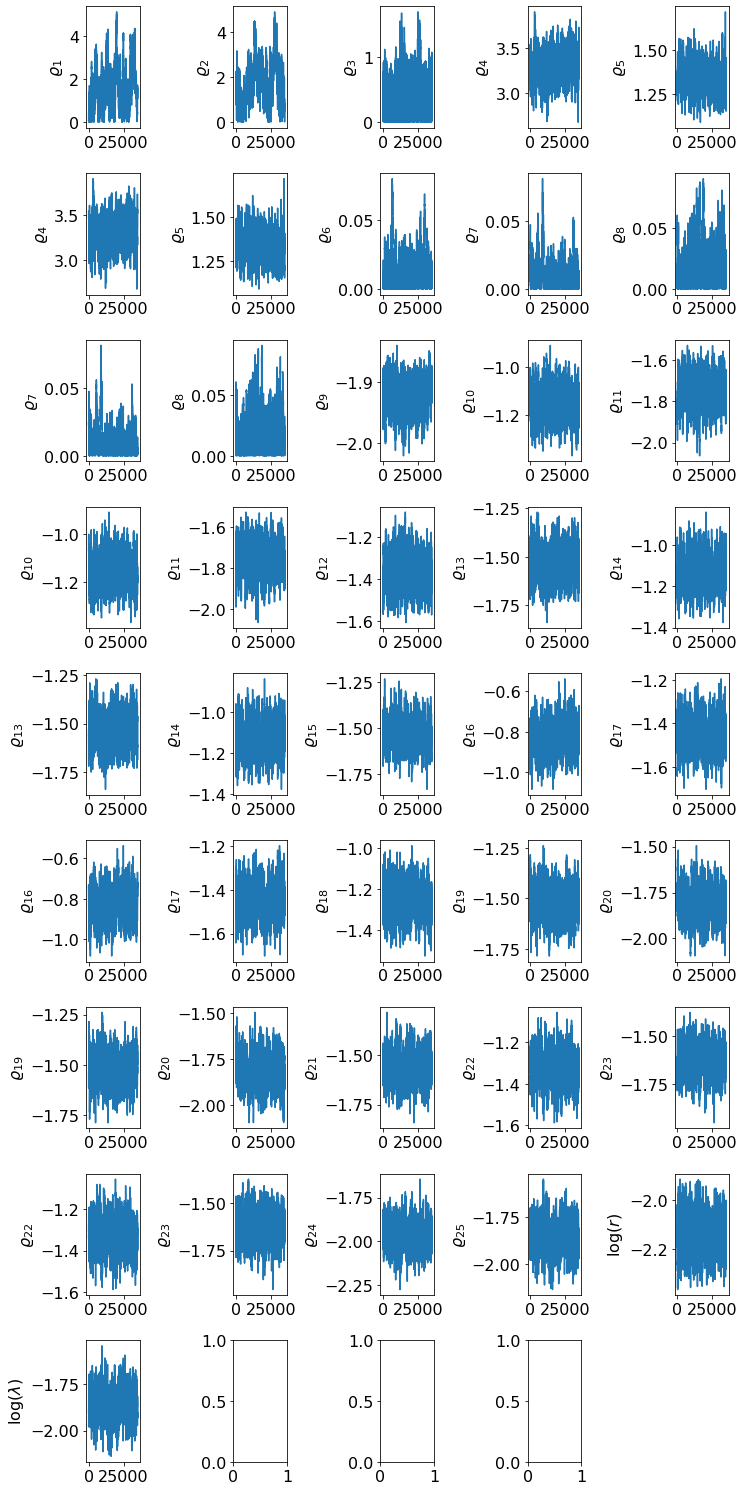

In [7]:
onset = 0
offset = len(logLLog[logLLog>-1e15])



parameterN = parLog.shape[1]
fig, ax = plt.subplots(9,5,figsize=(10.5, 21))


for i in range(9):    
    for j in range(5):
    
        if (5*i+j)<39:
            ax[i,j].plot(parLog[onset:offset,5*i+j])
            ax[i,j].set_ylabel('$\\varrho_{'+str(1+5*i+j)+'}$')
        if 5*i+j==39:
            ax[i,j].plot(parLog[onset:offset,5*i+j])
            ax[i,j].set_ylabel('$\log(r)$')
        if 5*i+j==40:
            ax[i,j].plot(parLog[onset:offset,5*i+j])
            ax[i,j].set_ylabel('$\log(\\lambda)$')


ax[-1, -1].axis('off')        
fig.tight_layout()

In [ ]:
#Lin Tin Data  

fig = plt.figure()

fig, ax = plt.subplots(4,5,figsize=(12, 8))

onset = 0
end = len(logLLog[logLLog>-1e15])

colors = cm.plasma(np.linspace(0,1,12))

for i in range(4):    
    for j in range(5):
        if (5*i+j)<15:
            ax[i,j].hist((parLog[onset:end,5*i+j]), bins=80, facecolor=colors[0],density=True)
            ax[i,j].set_ylabel('$\\varrho_{'+str(5*i+j+1)+'}$')
        if 5*i+j==15:
            ax[i,j].hist((parLog[onset:end,5*i+j]), bins=80, facecolor=colors[0],density=True)
            ax[i,j].set_ylabel('$\log(r)$')
        if 5*i+j==16:
            ax[i,j].hist((parLog[onset:end,5*i+j]), bins=80, facecolor=colors[0],density=True)
            ax[i,j].set_ylabel('$\log(\\lambda)$')

ax[-1, -1].axis('off')
ax[-1, -2].axis('off')
ax[-1, -3].axis('off')

fig.tight_layout()

fig.savefig('MSAHist.pdf')